In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Dataset_Maladie_Cadiovasculaire.csv', delimiter=';')

In [3]:
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [35]:
labelEncoder = preprocessing.LabelEncoder()
#Transformation AUTOMATIQUE des valeurs catégoriques
df['famhist'] = labelEncoder.fit_transform(df['famhist'])

<AxesSubplot:>

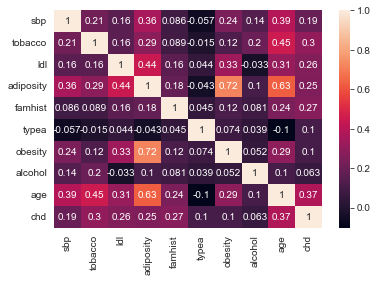

In [36]:
sns.heatmap(df.corr(), annot=True)

On observe à l'aide de cette heatmap que le paramètre chd est corrélé à beaucoup de paramètres. Certains ressortent tout de même du lot, mais sont en rien décisif : Age, Tobacco, ldl, adiposity, sbp.

A partir de là, on peut déjà supposer qu'une regression linéaire ne sera pas forcément efficace (multi linéaire au minima). De plus, une fonction affine obtenue par regression linéaire ne sera pas capable de prédire une répartition sur une valeur booléenne. Une régression linéaire ne peut pas convenir à ces données.

Regardons à présent pour une régression logistique

In [5]:
df.drop("ind", axis=1, inplace=True)

In [42]:
# Creating X and y
X = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'age', 'famhist']]
y = df['chd']

# Splitting the variables as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [43]:
#instantiate the model
log_regression = LogisticRegression(max_iter=1000000, solver='liblinear')

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79, 12],
       [27, 21]], dtype=int64)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7194244604316546


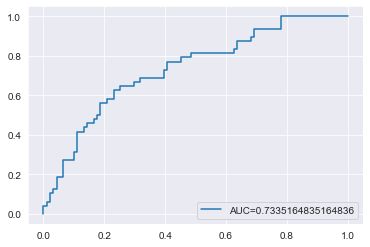

In [41]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()